Train finder project - Startx recruiting

Data:
1. Citizens are giving time and location when hear train
2. Train has a constant speed
3. Train changes direction based on track curves


Problems:
1. people don't know their exact location (therefore data not completely accurate)
2. they may hear another train (giving a false positive)

Ways to mitigate/minize these errors:

Problem 1:
    - use an average of the locations at a certain time to estimate the train's location
   
Problem 2: 
    - set a max distance from the average that the report could be from
    - set a time check, so that only accept responses when know train will be going through that area (not possible with this data since don't have the train schedule) 

Tasks:
1. Import JSON text file and convert to a Python dictionary
2. organize the reports by their time stamp, so can plot sequentially
- visualize raw data (plot)
3. Average the data for each time point so can determine the likely position of the train
4. Plot the position for each time point and connect with a line sequentially over time

Extra:
1. Create a function that does exponential averaging of the data set (for a more accurate path)
2. Call the function to process the given data set
3. Visualization - create a plot that shows raw and smoothed data
4. Remove any outlier reports that are for other trains based on average train coordinates at that time)

Things to decide on (for extra smoothing task):
1. The value of the smoothing weight for the exponential smoothing of the data (with a larger #, new values will have less effect on the average)
2. The period of data points to use in a smoothing section



In [1]:
##importing the JSON txt file and creating a Python dictionary of the data

import json

#creating path to find data file, the base_path needs to change depending on computer
base_path = "/Users/kathrynclancy/Desktop/Python/freight-train-v002/freight-train/"
filename = "reports.txt"
path_to_file = base_path + filename

#opens and reads file
f=open(path_to_file,"r")
a = f.read()

#changing variable "a" from a string to a dictionary
data_file = json.loads(a)

#print(data_file)
#type (data_file)

reports = data_file['reports']

In [2]:
#Sorting the reports by timestamp 
#The data_file is a dictionary and 'reports' is a list of dictionaries.
#Sorting was not necessary but a good check to see that the data getting for timepoint 0 matches

reports_sorted = sorted(reports, key=lambda x: x['timestamp'])

In [3]:
#Determining the max and min x- and y-coordinates of the map
#This is needed to know what size of axes to use for the map when plotting a single timepoint
# (if plotting all timepoints at the same time it is not necessary)

#change 'y' to 'x' for x-coordinates
seq = [call['y'] for call in reports]
min(seq)
max(seq)

#x(min,max)= (220.32382750135298, 317.7979523442891)
#y(min,max)= (-191.71256688415923, -124.20699540849206)

-124.20699540849206

In [22]:
#Getting the data for a each timepoint into a single dictionary that can be plotted

data = {"x":[], "y":[], "timestamp":[]}
for call in reports:
# if call['timestamp'] == 0:
    for key,num in call.items():
        if key == 'x':
            data["x"].append(num)
        if key == 'y':
            data["y"].append(num)
        if key == 'timestamp':
            data["timestamp"].append(num)

#Getting the average location for each timepoint but getting all values of x and y
# at each timepoint and then averaging the values for that timepoint
import collections

x_temp = collections.defaultdict(list)
y_temp = collections.defaultdict(list)

for call in reports:
    x_temp[call['timestamp']].append(call['x'])
    y_temp[call['timestamp']].append(call['y'])

x_mean = {k:sum(v)/len(v) for k,v in x_temp.items()}
y_mean = {k:sum(v)/len(v) for k,v in y_temp.items()}

#converting x_mean and y_mean into lists within a dictionary so they can be plotted
data_mean = {"x_mean":[], "y_mean":[], "timestamp":[]}
for key,num in x_mean.items():
    data_mean["x_mean"].append(num)
for key,num in y_mean.items():
    data_mean["y_mean"].append(num)
for key,num in call.items():
    data_mean["timestamp"].append(call['timestamp'])


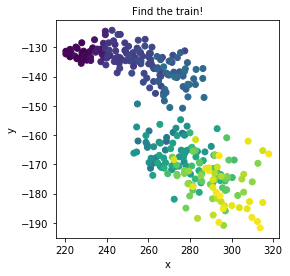

In [24]:
#Plotting the data for a all timepoints (raw data)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Display scatter plot data, 
# making colour change based on the time of the report so can see direction of train movement
fig, axes = plt.subplots(figsize=(4,4))
axes.set_title('Find the train!', fontsize=10)
axes.set_xlabel('x', fontsize=10)
axes.set_ylabel('y', fontsize=10)
axes.scatter(data["x"], data["y"], marker = 'o',c=data['timestamp'])
#axes.set_ylim([-191.71256688415923, -124.20699540849206])
#axes.set_xlim([220.32382750135298, 317.7979523442891])

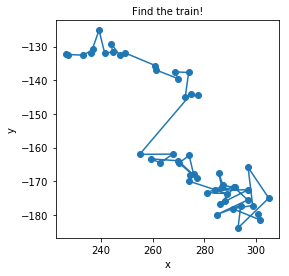

In [25]:
#Plotting the averaged data for a each timepoint
#This gives a more precise location of the train on the map
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# display line plot data of mean location
fig, axes = plt.subplots(figsize=(4,4))
axes.set_title('Find the train!', fontsize=10)
axes.set_xlabel('x', fontsize=10)
axes.set_ylabel('y', fontsize=10)
axes.plot(data_mean["x_mean"], data_mean["y_mean"], marker = 'o')
#axes.set_ylim([-191.71256688415923, -124.20699540849206])
#axes.set_xlim([220.32382750135298, 317.7979523442891])

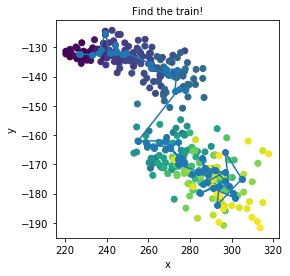

In [26]:
#Plotting both the raw data and averaged data together
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Display scatter plot data, 
# making colour change based on the time of the report so can see direction of train movement
fig, axes = plt.subplots(figsize=(4,4))
axes.set_title('Find the train!', fontsize=10)
axes.set_xlabel('x', fontsize=10)
axes.set_ylabel('y', fontsize=10)
axes.scatter(data["x"], data["y"], marker = 'o',c=data['timestamp'])
axes.plot(data_mean["x_mean"], data_mean["y_mean"], marker = 'o')
#axes.set_ylim([-191.71256688415923, -124.20699540849206])
#axes.set_xlim([220.32382750135298, 317.7979523442891])

Code: 

    Please see project outline at the beginning. I completed the 'Tasks' portion but did not get to the 'Extra' that would have made for better data smoothing and visualization.
    

Visualization:

    I wanted to create a plot for each timestamp with all the reports for that time. I could then create a successive display of the plots so you could see how the raw data was changing over time.
    
    The idea was to then implement an exponential smoothing calculation with the data to find the average (x,y) coordinate of each time point. I could then create a topographical map with the averaged data using these averaged (x,y) coordinates and connecting them with a line (that speficied where was beginning and end).
    
    What I did in the end was plot all of the raw data and changed the colour of the plots based on the timestamp so that visually you could see how the train was moving through time based on the colour. I then averaged the data for each timestamp so a more precise location of the train could be seen.

Tests:

    I used the Jupyter notebook to test each section as I coded so I could make sure each worked before compiling all the different sections together.
    
    To make sure I was importing the correct file and successfully assigning it to the 'reports' variable, I would print the variable and very the data visually. I would also check the variable type of each variable to make sure I had created what I thought I had.
    
Analysis:

    I attempted to make each variable and function name intuitive so people could easily understand and follow the code. I also wrote each piece of code in different sections that have comments so it could be more easily followed. These sections could later be each turned into a different function and then merge all of the code into a single section (calling each of the separate functions needed). 
    
    I like the simplicity of the changing colour visualization to see where the train is. Smoothing of the data in the end would have made it more visually clear.
   


ROUGH/WRONG WORK:    

In [ ]:
reports_sorted = sorted(data_file.keys(), key=lambda x: (data_file[x]['timestamp']))

#Plotting the ordered data
#1. Create a loop to go through each time point and display the data
#2. Plot the data for each time point averaged and connect with a line
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates


#loop, need to iterate through and make plot for each timestamp value 
## INCOMPLETE
for report in reports_sorted:
    for time in reports_sorted['timestamp']:


#averaging the data for each time point
# INCOMPLETE

reports_av = sum(d['timestamp'] for d in reports_sorted)

for i in reports_sorted:
    x, y = zip(*reports_sorted) # unpack a list of pairs into two tuples
    #unsure how to call only one timestamp from dictionary and get coordinates
    plt.plot(x, y)
    plt.show()

#plotting the (x,y) coordinates for each time point



In [ ]:
#Getting the average location for each timepoint - this stuff didn't work:
#data_sum = {"x_sum":[], "y_sum":[], "timestamp":[]}
data_mean = {"x_mean":[], "y_mean":[], "timestamp":[]}
for call in reports:
    for key,num in call.items():
        if key == 'x':
            for call['timestamp'] in reports:
            #data_sum["x_sum"].append(num)
                data_mean["x_mean"] = [numpy.mean(data_sum["x_sum"])]
        if key == 'y':
            for call['timestamp'] in reports:
                data_mean["y_mean"] = [numpy.mean(num)]
        if key == 'timestamp':
            data_mean["timestamp"].append(num)
            
#need to determine if it is major difference if take mean over total number of entries or 
#if do mean as the entries come in (i.e. mean of 4+6, then this+2 or mean of 2,4,6)


#for call['timestamp'] in reports:
#    data["x_mean"] = [numpy.mean(num)for key,num in call.items() if key == 'x'] 
    
    #data["y_mean"] = [numpy.mean(num) for key,num in call.items() if key == 'y']
    #if key == 'timestamp':
     #   data["timestamp"].append(num)

#print(data_mean)